In [1]:
%%capture install_libraries
!pip install pandas
!pip install sklearn

### ArcGis

https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6


### RIVM


https://www.rivm.nl/coronavirus-kaart-van-nederland

    

In [2]:
import pandas as pd
import sklearn
import numpy as np

In [44]:
corono_cases_since_28_feb = [2,6,8,18,23,38,82,128,188,265,321,342,382,497,614,804,959,1413, 1705, 2050, 2460, 2994, 3631, 4204, 4749, 5560, 6412, 7431, 8603, 9762]
corono_cases_since_28_feb += [None, None, None]

In [45]:
date_range = pd.date_range(start='28/2/2020', periods=len(corono_cases_since_28_feb))

In [46]:
date_range

DatetimeIndex(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31'],
              dtype='datetime64[ns]', freq='D')

In [47]:
corona_cases = pd.DataFrame(corono_cases_since_28_feb, index=date_range, columns=["cases"])
corona_cases['factor'] = corona_cases['cases'] / corona_cases['cases'].shift(1)

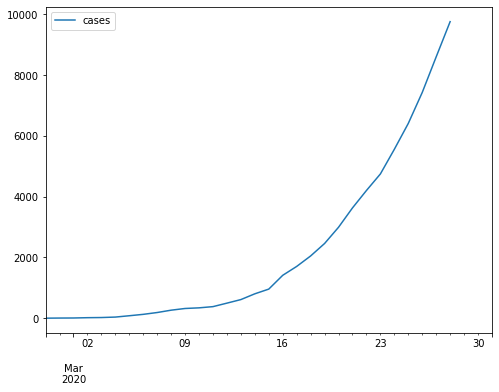

In [48]:
%matplotlib inline
corona_cases.plot(y=['cases'],figsize=(8,6))

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
current_count = np.sum(~pd.isna(corona_cases.cases))

count = range(current_count)

In [51]:
regr = LinearRegression()
regr.fit( X = np.array(count).reshape(-1,1), y=np.log(corona_cases.cases[:current_count]))

pred = regr.predict(np.arange(len(date_range)).reshape(-1,1))


w_regr = LinearRegression()


"""
Weighted LM, put extra weight on latest counts, and they contribute most to prediction for next day

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
"""
sample_weights = np.exp( np.arange(current_count) )

w_regr.fit( X = np.array(count).reshape(-1,1), y=np.log(corona_cases.cases[:current_count]), sample_weight=sample_weights)


weighted_pred = w_regr.predict(np.arange(len(date_range)).reshape(-1,1))




In [52]:
corona_cases["log"] = np.log(corona_cases.cases)
corona_cases["log_preds"] = pred
corona_cases["weighted_log_preds"] = weighted_pred

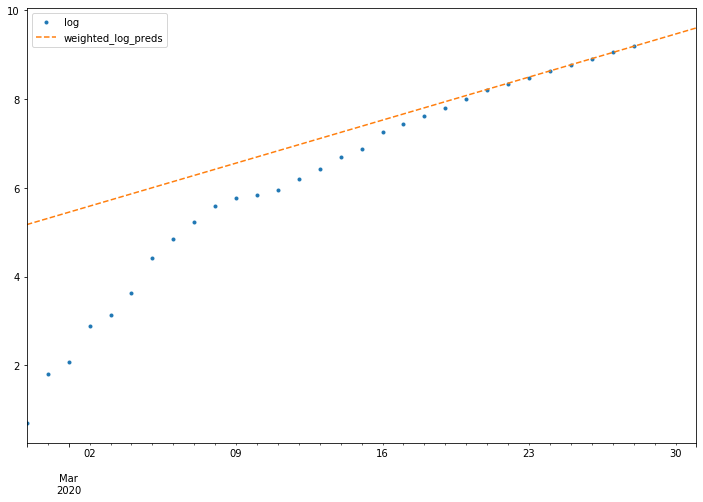

In [53]:
styles = ['.','--','--']

corona_cases.plot(y=["log", "weighted_log_preds"], style=styles, figsize=(12,8))

In [54]:
corona_cases["Prediction"] = np.exp(weighted_pred)

In [55]:
styles = ['-','-']

corona_cases.plot(y=['cases', "Prediction"], style=styles, figsize=(8,6))

In [56]:
corona_cases["factor_averaged"] = corona_cases["factor"].rolling(3).mean()
corona_cases["doubled_in_5"] = 2**(1/5)
corona_cases["doubled_in_3"] = 2**(1/3)

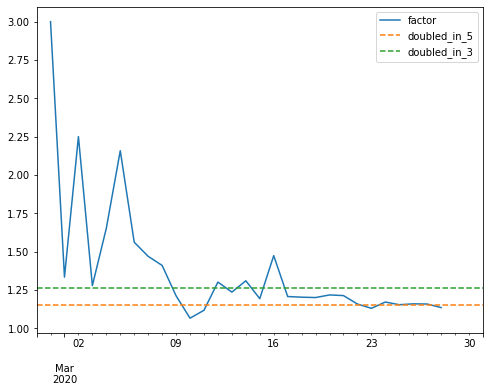

In [57]:
styles = ['-','--','--','--']

corona_cases.plot(y=['factor', 'doubled_in_5', 'doubled_in_3'], style=styles, figsize=(8,6))

In [58]:
corona_cases

cases    factor       log  log_preds  weighted_log_preds  \
2020-02-28     2.0       NaN  0.693147   2.417272            5.171330   
2020-02-29     6.0  3.000000  1.791759   2.677521            5.309870   
2020-03-01     8.0  1.333333  2.079442   2.937771            5.448411   
2020-03-02    18.0  2.250000  2.890372   3.198020            5.586952   
2020-03-03    23.0  1.277778  3.135494   3.458270            5.725493   
2020-03-04    38.0  1.652174  3.637586   3.718520            5.864033   
2020-03-05    82.0  2.157895  4.406719   3.978769            6.002574   
2020-03-06   128.0  1.560976  4.852030   4.239019            6.141115   
2020-03-07   188.0  1.468750  5.236442   4.499268            6.279655   
2020-03-08   265.0  1.409574  5.579730   4.759518            6.418196   
2020-03-09   321.0  1.211321  5.771441   5.019767            6.556737   
2020-03-10   342.0  1.065421  5.834811   5.280017            6.695277   
2020-03-11   382.0  1.116959  5.945421   5.540266            6.833818   
2020-03-12   497.0  1.301047  6.208590   5.800516            6.972359   
2020-03-13   614.0  1.235412  6.419995   6.060765            7.110900   
2020-03-14   804.0  1.309446  6.689599   6.321015            7.249440   
2020-03-15   959.0  1.192786  6.865891   6.581264            7.387981   
2020-03-16  1413.0  1.473410  7.253470   6.841514            7.526522   
2020-03-17  1705.0  1.206653  7.441320   7.101763            7.665062   
2020-03-18  2050.0  1.202346  7.625595   7.362013            7.803603   
2020-03-19  2460.0  1.200000  7.807917   7.622262            7.942144   
2020-03-20  2994.0  1.217073  8.004366   7.882512            8.080684   
2020-03-21  3631.0  1.212759  8.197263   8.142761            8.219225   
2020-03-22  4204.0  1.157808  8.343792   8.403011            8.357766   
2020-03-23  4749.0  1.129638  8.465689   8.663260            8.496307   
2020-03-24  5560.0  1.170773  8.623353   8.923510            8.634847   
2020-03-25  6412.0  1.153237  8.765927   9.183759            8.773388   
2020-03-26  7431.0  1.158921  8.913416   9.444009            8.911929   
2020-03-27  8603.0  1.157718  9.059866   9.704258            9.050469   
2020-03-28  9762.0  1.134720  9.186253   9.964508            9.189010   
2020-03-29     NaN       NaN       NaN  10.224757            9.327551   
2020-03-30     NaN       NaN       NaN  10.485007            9.466092   
2020-03-31     NaN       NaN       NaN  10.745256            9.604632   

              Prediction  factor_averaged  doubled_in_5  doubled_in_3  
2020-02-28    176.148913              NaN      1.148698      1.259921  
2020-02-29    202.324013              NaN      1.148698      1.259921  
2020-03-01    232.388639              NaN      1.148698      1.259921  
2020-03-02    266.920762         2.194444      1.148698      1.259921  
2020-03-03    306.584235         1.620370      1.148698      1.259921  
2020-03-04    352.141558         1.726651      1.148698      1.259921  
2020-03-05    404.468536         1.695949      1.148698      1.259921  
2020-03-06    464.571117         1.790348      1.148698      1.259921  
2020-03-07    533.604728         1.729207      1.148698      1.259921  
2020-03-08    612.896486         1.479767      1.148698      1.259921  
2020-03-09    703.970716         1.363215      1.148698      1.259921  
2020-03-10    808.578252         1.228772      1.148698      1.259921  
2020-03-11    928.730095         1.131233      1.148698      1.259921  
2020-03-12   1066.736073         1.161142      1.148698      1.259921  
2020-03-13   1225.249246         1.217806      1.148698      1.259921  
2020-03-14   1407.316911         1.281969      1.148698      1.259921  
2020-03-15   1616.439182         1.245882      1.148698      1.259921  
2020-03-16   1856.636275         1.325214      1.148698      1.259921  
2020-03-17   2132.525800         1.290949      1.148698      1.259921  
2020-03-18   2449.411523         1.294136      1.148698      1.259921  
2020-03-19   2813.